In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
#module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
import tensorflow_text
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder-multilingual/3" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)

#load pandas dataframe (rimuovo le righe vuote che putroppo sono presenti)
vax_df = pd.read_csv('data/posts_cleaned_it_only.csv')
vax_df.dropna(inplace=True)

vax_series = vax_df['clean_text']
vax_text = vax_series.tolist()



module https://tfhub.dev/google/universal-sentence-encoder-multilingual/3 loaded


In [3]:
#Vettorizza a 512 dimensioni ogni frase
sentences_number = len(vax_text)
BATCH_SIZE = 1000

start = 0
stop = BATCH_SIZE
sentence_vector: np.ndarray = np.zeros((sentences_number, 512))
while sentences_number > 0:
    print("Processing sentences from {} to {}".format(start, stop))
    sentence_embeddings = model(vax_text[start:stop])
    sentence_vector[start:stop] = sentence_embeddings

    processed = stop - start
    sentences_number -= processed

    start = stop

    if sentences_number < BATCH_SIZE:
        stop += sentences_number
    else:
        stop += BATCH_SIZE

print("Shape of sentence vector: ", sentence_vector.shape)

Processing sentences from 0 to 1000


2023-05-15 09:09:28.351008: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 221977600 exceeds 10% of free system memory.
2023-05-15 09:09:29.041724: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 221977600 exceeds 10% of free system memory.
2023-05-15 09:09:29.366160: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 221977600 exceeds 10% of free system memory.
2023-05-15 09:09:29.434566: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 221977600 exceeds 10% of free system memory.
2023-05-15 09:09:29.508677: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 221977600 exceeds 10% of free system memory.


Processing sentences from 1000 to 2000
Processing sentences from 2000 to 3000
Processing sentences from 3000 to 4000
Processing sentences from 4000 to 5000
Processing sentences from 5000 to 6000
Processing sentences from 6000 to 7000
Processing sentences from 7000 to 8000
Processing sentences from 8000 to 9000
Processing sentences from 9000 to 10000
Processing sentences from 10000 to 11000
Processing sentences from 11000 to 12000
Processing sentences from 12000 to 13000
Processing sentences from 13000 to 14000
Processing sentences from 14000 to 15000
Processing sentences from 15000 to 16000
Processing sentences from 16000 to 17000
Processing sentences from 17000 to 18000
Processing sentences from 18000 to 19000
Processing sentences from 19000 to 19104
Shape of sentence vector:  (19104, 512)


In [48]:
import numpy as np
# k-means - Inertia as the number of clusters varies
from sklearn.cluster import KMeans
from scipy.spatial.distance import cosine, euclidean
from sklearn import preprocessing  # to normalise existing X

#create a numpy array with all the vectors
'''
vectors = np.zeros((len(sentence_embeddings), 512))
for i in range(len(sentence_embeddings)):
    vectors[i] = sentence_embeddings[i]
'''
vectors = sentence_vector
#normalize
vectors = preprocessing.normalize(vectors)

X_train = pd.DataFrame(vectors)

n_clusters = 2
n_init = 10
max_iter = 3000
tol = 0.0001
random_state = 2018
# n_jobs = 2

kmeansfirst = KMeans(n_clusters=n_clusters, n_init=n_init, \
    max_iter=max_iter, tol=tol, random_state=random_state )
   
kmeansfirst.fit(X_train)

center = kmeansfirst.cluster_centers_

#predict the labels of clusters.
label_PCA = kmeansPCA.fit_predict(df)

print(kmeansfirst.score(vectors))

#calculate the distance between each point and the center
X_train['distance'] = X_train.apply(lambda x: cosine(x, center[0]), axis=1)

#Add a colums with the cluster number
X_train['cluster'] = kmeansfirst.labels_

#add a column with the text (using the vax_text serier)
X_train['text'] = vax_text

# count the number of elements in each cluster
X_train.groupby('cluster').count()


-13035.217008257841


,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,distance,text
cluster,,,,,,,,,,,,,,,,,,,,,
0,11210,11210,11210,11210,11210,11210,11210,11210,11210,11210,...,11210,11210,11210,11210,11210,11210,11210,11210,11210,11210
1,7894,7894,7894,7894,7894,7894,7894,7894,7894,7894,...,7894,7894,7894,7894,7894,7894,7894,7894,7894,7894


In [45]:
#Importing required modules
 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#cambiare per effettuare la PCA con il numero di componenti desiderato (2 o 3 per visualizzare i dati)
pca = PCA(3)
 
#Transform the data
df = pca.fit_transform(sentence_vector)
 
#Import required module
from sklearn.cluster import KMeans
 
n_clusters = 2
n_init = 10
max_iter = 3000
tol = 0.0001
random_state = 2018
# n_jobs = 2

kmeansPCA = KMeans(n_clusters=n_clusters, n_init=n_init, \
    max_iter=max_iter, tol=tol, random_state=random_state )
   
kmeansPCA.fit(df)

#predict the labels of clusters.
label_PCA = kmeansPCA.fit_predict(df)

center_pca = kmeansPCA.cluster_centers_

# create a dataframe from the PCA results
df = pd.DataFrame(df)
df.columns = ['x', 'y', 'z']
df['cluster'] = label_PCA

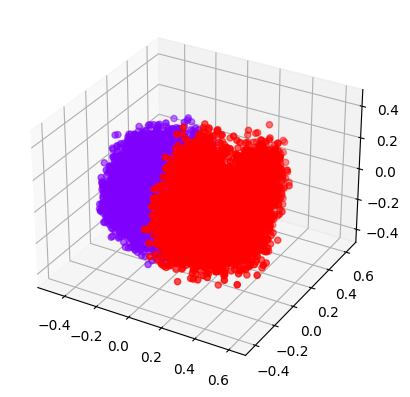

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

# Creating plot
ax.scatter3D(df['x'], df['y'], df['z'], c=df['cluster'], cmap='rainbow')

    
#plotting the results
plt.show()

In [89]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cosine, euclidean
from sklearn import preprocessing  # to normalise existing X
from sklearn.decomposition import PCA
import numpy as np

vectors = sentence_vector
#normalize
#vectors = preprocessing.normalize(vectors)

X_train = pd.DataFrame(vectors)

n_clusters = 2
n_init = 10
max_iter = 3000
tol = 0.0001
random_state = 2018
'''
kmeansfirst = KMeans(n_clusters=n_clusters, n_init=n_init, \
    max_iter=max_iter, tol=tol, random_state=random_state )
 '''

 #dbscan clustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Compute DBSCAN
labels = DBSCAN(eps=0.5, min_samples=10,metric="cosine").fit_predict(X_train)





#kmeansfirst.fit(X_train)

#   center = kmeansfirst.cluster_centers_

#label = kmeansPCA.fit_predict(X_train)

#print(kmeansfirst.score(vectors))

pca = PCA(3)
 
#Transform the data
df = pca.fit_transform(X_train)

# create a dataframe from the PCA results
df = pd.DataFrame(df)

df.columns = ['x', 'y', 'z']
df['cluster'] = labels

#add the text column
df['text'] = vax_text

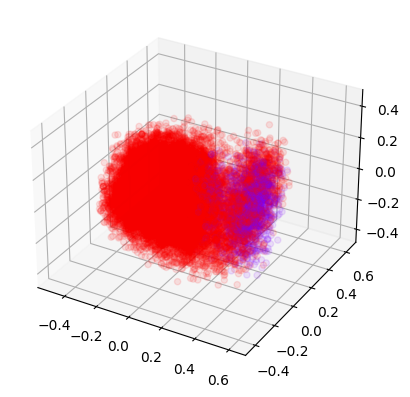

In [90]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

# Creating plot
ax.scatter3D(df['x'], df['y'],df['z'],alpha=0.1, c=df['cluster'], cmap='rainbow')

    
#plotting the results
plt.show()

In [103]:
#select the row that has cluste = -1
anomalies = df[df['cluster'] == -1]["text"]
for i in anomalies:
    print(i)
    print()

pronta per affrontare la settimana quirinale 22 booster

2015. titre booster, allez ciao !!!

spesso alcuni nomi seguono le mode del momento i figli maschi dei nazivax li chiameranno booster

terza dose fatta. questa sera un cocktail di scampi con black mayo non me la leva nessuno. per l'occasione evocherò il grande cthulhu booster

se addirittura vuoi andare contro le indicazioni sui booster dell'ema e dell'aifa che spiegano in ritardo ma meglio tardi che mai i pericoli reali vuol dire che vai contro sia le direttive europee come quelle nazionali

par le 359 3/6 effetto booster

poche idee e molto confuse come motto since 2020. covid19 booster moderna

berlinguer li prendeva a calci nel culo covid greenpass rafforzato cruciani la zanzara capezzone dragoni fuori dal coro omicron booster

via colori stop scadenza pass col booster: cè lapertura del governo - colori scadenza booster: l'apertura

booster ...inglesismi del czz !! abbiamo una lingua?... ... preferiamo mortificarla?

sono tor